In [1]:
#!pip install nba_api
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

closed_file = 'NBA PROJECTS.csv'
nba = pd.read_csv(closed_file)
nba = nba.loc[(nba['Tm'] != 'TOT')& (nba['Year'] >= 1990)] 
#print(nba.columns)

In [2]:
record_file = 'NBA Season Records.csv'
records = pd.read_csv(record_file)
records = records.drop(['SRS','Pace','Rel_Pace','ORtg','Rel_ORtg','DRtg','Rel_DRtg'], axis = 1)
ssns = []
for year in records['Season']:
    yr = int(year.split('-')[1])
    if ((10 <= yr) & (yr < 20)):
        ssns.append(float('20' + str(yr)))
    elif((0 <= yr) & (yr < 10)):
        ssns.append(float('200' + str(yr)))
    else:
        ssns.append(float('19' + str(yr)))
seasons = pd.Series(ssns)
records['Season'] = seasons

records['Team'] = records['Team'].str.replace('*', '')
records['Made Playoffs'] = records['Playoffs'].notna()
print(records)

      Season   Lg                 Team   W   L   W/L%  Finish  \
0     2018.0  NBA       Boston Celtics  29  10  0.744       1   
1     2017.0  NBA       Boston Celtics  53  29  0.646       1   
2     2016.0  NBA       Boston Celtics  48  34  0.585       2   
3     2015.0  NBA       Boston Celtics  40  42  0.488       2   
4     2014.0  NBA       Boston Celtics  25  57  0.305       4   
...      ...  ...                  ...  ..  ..    ...     ...   
1478  2000.0  NBA  Vancouver Grizzlies  22  60  0.268       7   
1479  1999.0  NBA  Vancouver Grizzlies   8  42  0.160       7   
1480  1998.0  NBA  Vancouver Grizzlies  19  63  0.232       6   
1481  1997.0  NBA  Vancouver Grizzlies  14  68  0.171       7   
1482  1996.0  NBA  Vancouver Grizzlies  15  67  0.183       7   

                    Playoffs                              Coaches  \
0                        NaN                   B. Stevens (29-10)   
1       Lost E. Conf. Finals                   B. Stevens (53-29)   
2     Lost E

In [3]:
print(nba['Tm'].unique())
nba = nba.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})
print(nba["Tm"].unique())
print(nba[['Year', 'Player', 'Tm', '3PA']])


# SEA---> OKC 
#CHH NOH NOK-----> NOP 
#CHO--->CHA

['ORL' 'DEN' 'DET' 'SAC' 'WSB' 'DAL' 'MIL' 'CHH' 'PHI' 'SAS' 'CHI' 'BOS'
 'UTA' 'LAC' 'SEA' 'ATL' 'PHO' 'CLE' 'GSW' 'NJN' 'HOU' 'MIN' 'POR' 'LAL'
 'NYK' 'MIA' 'IND' 'VAN' 'TOR' 'WAS' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BRK'
 'NOP' 'CHO']
['ORL' 'DEN' 'DET' 'SAC' 'WAS' 'DAL' 'MIL' 'NOP' 'PHI' 'SAS' 'CHI' 'BOS'
 'UTA' 'LAC' 'OKC' 'ATL' 'PHO' 'CLE' 'GSW' 'BRK' 'HOU' 'MIN' 'POR' 'LAL'
 'NYK' 'MIA' 'IND' 'MEM' 'TOR' 'CHA']
         Year             Player   Tm    3PA
9547   1990.0         Mark Acres  ORL    4.0
9548   1990.0      Michael Adams  DEN  432.0
9549   1990.0       Mark Aguirre  DET   93.0
9550   1990.0        Danny Ainge  SAC  289.0
9551   1990.0        Mark Alarie  WAS   49.0
...       ...                ...  ...    ...
24686  2017.0        Cody Zeller  CHA    1.0
24687  2017.0       Tyler Zeller  BOS    1.0
24688  2017.0  Stephen Zimmerman  ORL    0.0
24689  2017.0        Paul Zipser  CHI   99.0
24690  2017.0        Ivica Zubac  LAL    3.0

[13777 rows x 4 columns]


In [4]:
teams = nba.groupby(['Tm', 'Year'])
teams['WS'].sum()

Tm   Year  
ATL  1990.0    42.8
     1991.0    43.8
     1992.0    37.5
     1993.0    40.0
     1994.0    56.8
               ... 
WAS  2013.0    34.5
     2014.0    45.3
     2015.0    45.4
     2016.0    39.7
     2017.0    46.9
Name: WS, Length: 813, dtype: float64

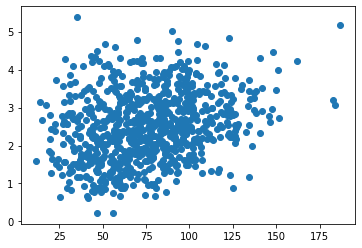

In [5]:
x = teams['3PA'].mean()
y = teams['WS'].mean()
plt.scatter(x,y)